In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

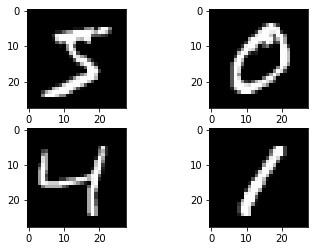

In [5]:
plt.subplot(221)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
# Baseline model

In [7]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [8]:
seed=7
numpy.random.seed(seed)

In [9]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [10]:
num_pixels = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation='relu'))
    model.add(Dense(num_classes,kernel_initializer='normal',activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
    return model

In [15]:
model = baseline_model()
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)

W0424 18:14:05.710763 140684522518336 deprecation.py:323] From /home/arvind/.local/lib/python3.6/site-packages/keras/optimizers.py:550: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.
W0424 18:14:05.906582 140684522518336 module_wrapper.py:136] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2716 - accuracy: 0.9228 - val_loss: 0.1390 - val_accuracy: 0.9600
Epoch 2/10
 - 4s - loss: 0.1100 - accuracy: 0.9682 - val_loss: 0.0958 - val_accuracy: 0.9706
Epoch 3/10
 - 4s - loss: 0.0698 - accuracy: 0.9799 - val_loss: 0.0733 - val_accuracy: 0.9775
Epoch 4/10
 - 4s - loss: 0.0492 - accuracy: 0.9857 - val_loss: 0.0696 - val_accuracy: 0.9785
Epoch 5/10
 - 4s - loss: 0.0358 - accuracy: 0.9899 - val_loss: 0.0662 - val_accuracy: 0.9793
Epoch 6/10
 - 4s - loss: 0.0261 - accuracy: 0.9930 - val_loss: 0.0661 - val_accuracy: 0.9791
Epoch 7/10
 - 4s - loss: 0.0199 - accuracy: 0.9949 - val_loss: 0.0602 - val_accuracy: 0.9809
Epoch 8/10
 - 4s - loss: 0.0151 - accuracy: 0.9965 - val_loss: 0.0600 - val_accuracy: 0.9800
Epoch 9/10
 - 4s - loss: 0.0105 - accuracy: 0.9978 - val_loss: 0.0623 - val_accuracy: 0.9799
Epoch 10/10
 - 4s - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.0591 - val_accuracy: 0.9810


In [16]:
scores = model.evaluate(X_test,y_test,verbose=0)
print("Baseline Error: %.2f%%"%(100-scores[1]*100))

Baseline Error: 1.90%


In [17]:
# Convolutional neural network

In [18]:
import numpy 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [19]:
seed = 7
numpy.random.seed(seed)

In [20]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')

In [21]:
X_train=X_train/255
X_test = X_test/255

In [22]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [29]:
def baseline_model():
    model = Sequential()
    model.add(Convolution2D(32,(5,5),data_format="channels_first",padding = 'valid',input_shape = (1,28,28),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [30]:
model = baseline_model()

W0424 18:37:45.792385 140684522518336 module_wrapper.py:136] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [31]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 10,batch_size=200,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 23s - loss: 0.2331 - accuracy: 0.9327 - val_loss: 0.0775 - val_accuracy: 0.9753
Epoch 2/10
 - 22s - loss: 0.0702 - accuracy: 0.9790 - val_loss: 0.0554 - val_accuracy: 0.9813
Epoch 3/10
 - 22s - loss: 0.0506 - accuracy: 0.9845 - val_loss: 0.0408 - val_accuracy: 0.9866
Epoch 4/10
 - 23s - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0398 - val_accuracy: 0.9862
Epoch 5/10
 - 28s - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0344 - val_accuracy: 0.9883
Epoch 6/10
 - 28s - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0383 - val_accuracy: 0.9873
Epoch 7/10
 - 27s - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0367 - val_accuracy: 0.9879
Epoch 8/10
 - 25s - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0329 - val_accuracy: 0.9902
Epoch 9/10
 - 25s - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0356 - val_accuracy: 0.9895
Epoch 10/10
 - 23s - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0366 - val_accuracy: 0.9895


In [32]:
scores = model.evaluate(X_test,y_test,verbose=0)

In [33]:
print("Error: %.2f%%" %(100-scores[1]*100))

Error: 1.05%


In [34]:
# Larger CNN model

In [38]:
from keras import backend as K
K.image_data_format()

'channels_last'

In [41]:
def larger_model():
    model = Sequential()
    model.add(Convolution2D(30,(5,5),data_format="channels_first",input_shape = (1,28,28),activation='relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Convolution2D(15,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model

In [42]:
model = larger_model()

In [43]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 10, batch_size = 200,verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 24s - loss: 0.4556 - accuracy: 0.8571 - val_loss: 0.1201 - val_accuracy: 0.9618
Epoch 2/10
 - 23s - loss: 0.1287 - accuracy: 0.9605 - val_loss: 0.0785 - val_accuracy: 0.9736
Epoch 3/10
 - 23s - loss: 0.0937 - accuracy: 0.9713 - val_loss: 0.0512 - val_accuracy: 0.9825
Epoch 4/10
 - 23s - loss: 0.0752 - accuracy: 0.9765 - val_loss: 0.0548 - val_accuracy: 0.9832
Epoch 5/10
 - 23s - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0394 - val_accuracy: 0.9877
Epoch 6/10
 - 23s - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0387 - val_accuracy: 0.9878
Epoch 7/10
 - 23s - loss: 0.0482 - accuracy: 0.9841 - val_loss: 0.0346 - val_accuracy: 0.9884
Epoch 8/10
 - 23s - loss: 0.0437 - accuracy: 0.9855 - val_loss: 0.0302 - val_accuracy: 0.9895
Epoch 9/10
 - 23s - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0282 - val_accuracy: 0.9916
Epoch 10/10
 - 23s - loss: 0.0364 - accuracy: 0.9879 - val_loss: 0.0311 - val_accuracy: 0.9901


In [44]:
scores = model.evaluate(X_test,y_test,verbose=0)

In [45]:
print("Large CNN Error: %.2f%%" %(100-scores[1]*100))

Large CNN Error: 0.99%
